In [ ]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [ ]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV
G=3.881

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

In [3]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M

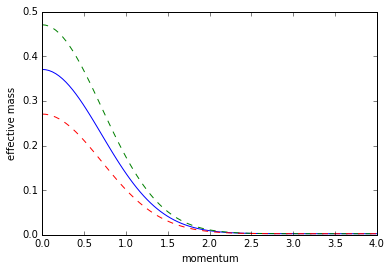

In [4]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective mass')
plt.xlabel('momentum')
plt.plot(x_range, [mstar(x,0.368) for x in x_range],x_range, [mstar(y,0.468) for y in x_range],'--',x_range, [mstar(z,0.268) for z in x_range],'--')

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

In [5]:
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E

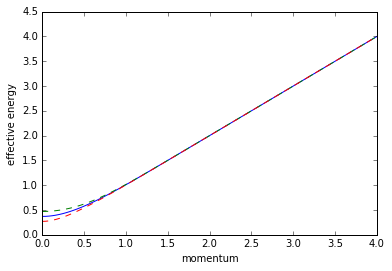

In [6]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective energy')
plt.xlabel('momentum')
plt.plot(x_range, [E(x,0.368) for x in x_range],x_range, [E(y,0.468) for y in x_range],'--',x_range, [E(z,0.268) for z in x_range],'--')

In [7]:
def Log_p(x,phi,mu,T):
    L = 0
    if (T):
        e_p = math.exp(-(E(x,phi)+mu)/T)
    L += T*math.log(1+e_p)
    return L

In [8]:
def Log_m(x,phi,mu,T):
    L = 0
    if (T):
        e_m = math.exp(-(E(x,phi)-mu)/T)
    L += T*math.log(1+e_m)
    return L

$||\frac{\partial \Omega}{\partial\phi}||=|\ \phi-\frac{12\cdot3.881}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}|$

In [9]:
def integrand(x,phi,mu,T):
    Func=12*G/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-math.exp(-(E(x,phi)-mu)/T)/(math.exp(-(E(x,phi)-mu)/T)+1)-math.exp(-(E(x,phi)+mu)/T)/(math.exp(-(E(x,phi)+mu)/T)+1))
    return Func

In [10]:
def Norm(phi,T):
    N,err=integrate.quad(integrand,0,np.inf,args=(phi,0,T))
    N=phi-N
    return abs(N)
#minimum is in 0.368

In [11]:
x_range=np.linspace(0,1,100)
z=[Norm(phi,0) for phi in x_range]

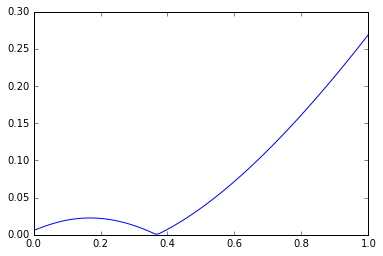

In [12]:
plt.plot(x_range,z)

Let's find $\phi(\mu=0,T)$

In [13]:
def Phi_T(T):
    phi=optimize.minimize(Norm,0.3,args=(T), tol=1e-10)
    return phi.x[0]

In [14]:
phi_0=Phi_T(0)
phi_0

0.36801804508311897

Let's plot $\phi(\mu=0,T)$

In [15]:
x_range=np.linspace(0,1,100)
z=[Phi_T(T) for T in x_range]

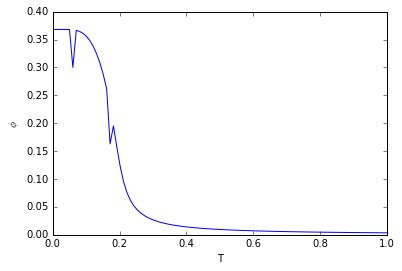

In [16]:
plt.ylabel('$\phi$')
plt.xlabel('T')
plt.plot(x_range,z)

I dunno why exist this pits.

Найдем потенциал $\Omega$ при $\mu=0$

$\Omega=\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty q^2dq\{E(x,\phi)-E(x,\phi_0)+2T\ln(1+e^{-E/T})\}$

In [17]:
def Omega_T(T):
    phi=Phi_T(T)
    phi0=Phi_T(0)
    Omega = (phi*phi-phi0*phi0)/4/G
    Integrand_1 = lambda x: (E(x,phi)-E(x,phi0))*x*x
    Int_1,err = integrate.quad(Integrand_1,0,np.inf)
    Omega -= 6/math.pi/math.pi*Int_1
    if (T):
        Integrand_2 = lambda x: (Log_m(x,phi,0,T)+Log_p(x,phi,0,T))*x*x
        Int_2,err = integrate.quad(Integrand_2,0,np.inf)
        Omega -= 6/math.pi/math.pi*Int_2
    return Omega

In [18]:
x_range=np.linspace(0,2,100)
z=[Omega_T(T) for T in x_range]

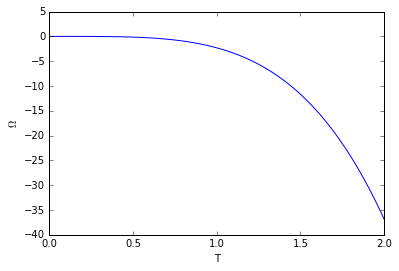

In [19]:
plt.ylabel('$\Omega$')
plt.xlabel('T')
plt.plot(x_range,z)

Найдем $x_{fermi}(\phi,\mu,T)$

In [20]:
def x_fermi(phi,mu,T):
    if (T==0)and(mu>m+phi):
        Func= lambda x: abs(E(x,phi)-mu)
        zz=optimize.minimize(Func,1,tol=1e-14)
        return zz.x[0]
    else:
        return np.inf

Зададим $D(\phi,\mu,T)$

In [21]:
def D(phi,mu,T):
    N,err=integrate.quad(integrand,0,x_fermi(phi,mu,T),args=(phi,mu,T))
    N=phi-N
    return N

$D(\phi,T=0)$

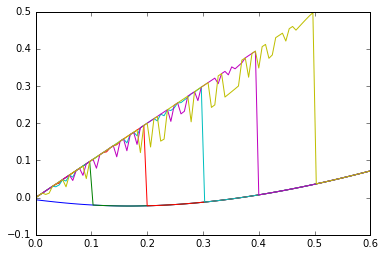

In [31]:
x_range=np.linspace(0,0.6,100)
for i in range(0,6):
    z[i]=[D(phi,i/10,0) for phi in x_range]
    plt.plot(x_range,z[i])

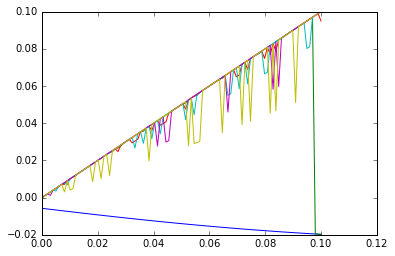

In [32]:
x_range=np.linspace(0,0.1,100)
for i in range(0,6):
    z[i]=[D(phi,i/10,0) for phi in x_range]
    plt.plot(x_range,z[i])

Выдает часть правильного ответа (они все выходят на линию нулевой температуры). Далее буду смотреть, как это править.

Определим $\phi(\mu,T)$

In [23]:
def Phi(mu,T):
    phi=optimize.fsolve(D,0.3,args=(mu,T), xtol=1e-10)
    return phi[0]

In [25]:
x_range=np.linspace(0,1,100)
z=[Phi(mu,0) for mu in x_range]

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/ana

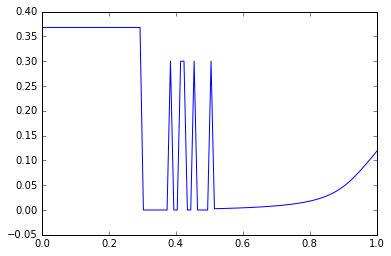

In [26]:
plt.plot(x_range,z)

Было интересно посмотреть, как комп будет себя вести, если ему не задать поиск нескольких решений. Позже я добавлю деление (0,0.368) на отрезки, на которых буду искать решения.